##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure (numerical): bp in mm/Hg
3.Specific Gravity (categorical): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin (categorical): al - (0,1,2,3,4,5)
5.Sugar (categorical): su - (0,1,2,3,4,5)
6.Red Blood Cells (categorial): rbc - (0, 1)
7.Pus Cell (categorical): pc - (0, 1)
8.Pus Cell clumps (categorical): pcc - (0, 1)
9.Bacteria (categorical): ba - (0, 1)
10.Blood Glucose Random (numerical): bgr in mgs/dl
11.Blood Urea (numerical): bu in mgs/dl
12.Serum Creatinine (numerical): sc in mgs/dl
13.Sodium (numerical): sod in mEq/L
14.Potassium (numerical): pot in mEq/L
15.Hemoglobin (numerical): hemo in gms
16.Packed Cell Volume (numerical)
17.White Blood Cell Count (numerical): wc in cells/cumm
18.Red Blood Cell Count (numerical): rc in millions/cmm
19.Hypertension (categorical): htn - (0, 1)
20.Diabetes Mellitus (categorical): dm - (0, 1)
21.Coronary Artery Disease (categorical): cad - (0, 1)
22.Appetite (categorical): appet - (0, 1)
23.Pedal Edema (categorical): pe - (0, 1)
24.Anemia (categorical): ane - (0, 1)
25.Class (categorical): class - (ckd, notckd)


Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset.

**B.** For each optimised model, answer the followings -

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. 

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. 

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\61422\Desktop\deakin\MACHINE LEARNING\A5\chronic_kidney_disease.csv")
df.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class     object
dtype: object

In [ ]:
df = df.replace('?', '')

In [ ]:
for i in df.columns:
  x = df[i].unique()
  print(x,'__',i)

['48' '7' '62' '51' '60' '68' '24' '52' '53' '50' '63' '40' '47' '61' '21'
 '42' '75' '69' '' '73' '70' '65' '76' '72' '82' '46' '45' '35' '54' '11'
 '59' '67' '15' '55' '44' '26' '64' '56' '5' '74' '38' '58' '71' '34' '17'
 '12' '43' '41' '57' '8' '39' '66' '81' '14' '27' '83' '30' '4' '3' '6'
 '32' '80' '49' '90' '78' '19' '2' '33' '36' '37' '23' '25' '20' '29' '28'
 '22' '79'] __ age
['80' '50' '70' '90' '' '100' '60' '110' '140' '180' '120'] __ bp
['1.02' '1.01' '1.005' '1.015' '' '1.025'] __ sg
['1' '4' '2' '3' '0' '' '5'] __ al
['0' '3' '4' '1' '' '2' '5'] __ su
[0 1] __ rbc
[0 1] __ pc
[1 0] __ pcc
[1 0] __ ba
['121' '' '423' '117' '106' '74' '100' '410' '138' '70' '490' '380' '208'
 '98' '157' '76' '99' '114' '263' '173' '95' '108' '156' '264' '123' '93'
 '107' '159' '140' '171' '270' '92' '137' '204' '79' '207' '124' '144'
 '91' '162' '246' '253' '141' '182' '86' '150' '146' '425' '112' '250'
 '360' '163' '129' '133' '102' '158' '165' '132' '104' '127' '415' '169'
 '251' '109'

In [ ]:
df.replace('', np.nan, inplace=True)
df1=df.replace(np.nan,0)

In [ ]:
X = df1.iloc[:, :-1]
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48,80,1.02,1,0,0,0,1,1,121,...,15.4,44,7800,5.2,0,0,1,1,1,1
1,7,50,1.02,4,0,0,0,1,1,0,...,11.3,38,6000,0.0,1,1,1,1,1,1
2,62,80,1.01,2,3,0,0,1,1,423,...,9.6,31,7500,0.0,1,0,1,0,1,0
3,48,70,1.005,4,0,0,1,0,1,117,...,11.2,32,6700,3.9,0,1,1,0,0,0
4,51,80,1.01,2,0,0,0,1,1,106,...,11.6,35,7300,4.6,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,0,0,1,1,140,...,15.7,47,6700,4.9,1,1,1,1,1,1
396,42,70,1.025,0,0,0,0,1,1,75,...,16.5,54,7800,6.2,1,1,1,1,1,1
397,12,80,1.02,0,0,0,0,1,1,100,...,15.8,49,6600,5.4,1,1,1,1,1,1
398,17,60,1.025,0,0,0,0,1,1,114,...,14.2,51,7200,5.9,1,1,1,1,1,1


In [ ]:
y = df1.iloc[:,-1:]
y=y.replace(to_replace ="ckd", 
                 value =1) 
y=y.replace(to_replace ="notckd", 
                 value =0) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=109)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_s= StandardScaler()

X_train= s_s.fit_transform(X_train)
X_test= s_s.transform(X_test)

# SVM

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear','poly','rbf'], 'C':[1, 10],'class_weight':['dict','balanced'],'gamma':['scale','auto']}
svc = svm.SVC()
clf_svm = GridSearchCV(svc, parameters,scoring='accuracy')
clf_svm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'class_weight': ['dict', 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print("",clf_svm.best_estimator_)
print("",clf_svm.best_score_)
print("",clf_svm.best_params_)
print("",clf_svm.best_index_)

 SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 0.9714285714285713
 {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
 20


               precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.99      0.97      0.98        76

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



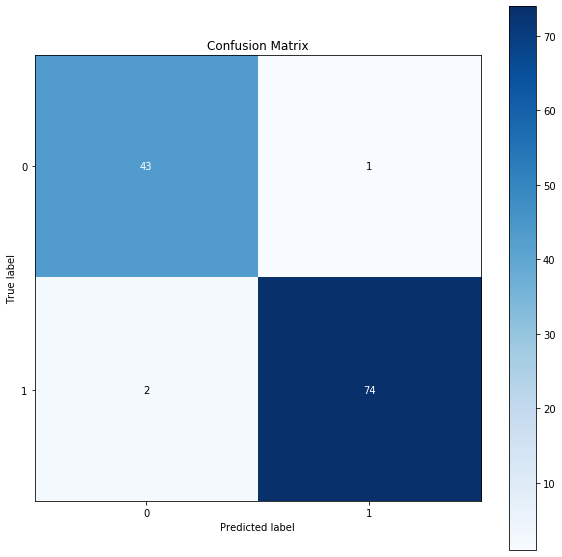

In [ ]:
y_pred_svm = clf_svm.predict(X_test)
print("",metrics.classification_report(y_test, y_pred_svm))
metrics.confusion_matrix(y_test, y_pred_svm)
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_svm,figsize=(10,10))

#  KNN


In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf_knn = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
Knn_model = clf_knn.fit(X_train, y_train)

In [ ]:
print("",Knn_model.best_estimator_)
print("",Knn_model.best_score_)
print("",Knn_model.best_params_)
print("",Knn_model.best_index_)

 KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')
 0.9392857142857144
 {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
 0


               precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.92      0.96        76

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



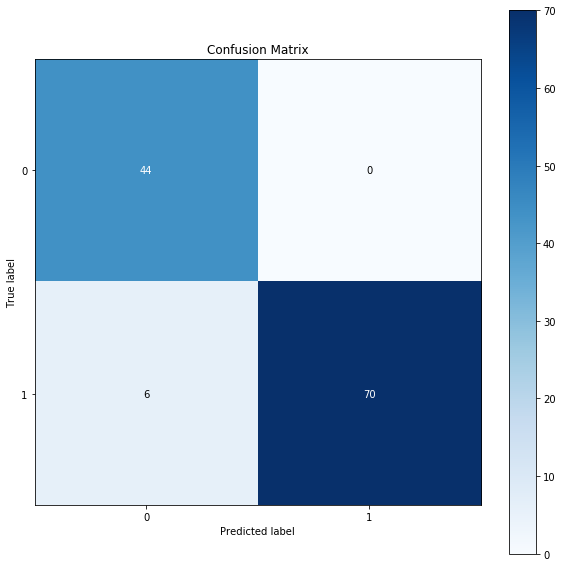

In [ ]:
import scikitplot as sciplt
y_pred_knn = Knn_model.predict(X_test)
print("",metrics.classification_report(y_test,y_pred_knn))
metrics.confusion_matrix(y_test, y_pred_knn)
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_knn,figsize=(10,10))

# DECISION TREE


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2,6)),'class_weight':['dict','balanced']}
DT_model = GridSearchCV(DecisionTreeClassifier(random_state=109), params, verbose=1, cv=10,scoring='accuracy')
DT_model.fit(X_train, y_train)

Fitting 10 folds for each of 784 candidates, totalling 7840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 7840 out of 7840 | elapsed:   40.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=109,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['dict', 'balanced'],
               

In [ ]:
print("",DT_model.best_estimator_)
print("",DT_model.best_score_)
print("",DT_model.best_params_)
print("",DT_model.best_index_)

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=109, splitter='best')
 0.9535714285714285
 {'class_weight': 'balanced', 'max_leaf_nodes': 4, 'min_samples_split': 2}
 400


               precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.99      0.95      0.97        76

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



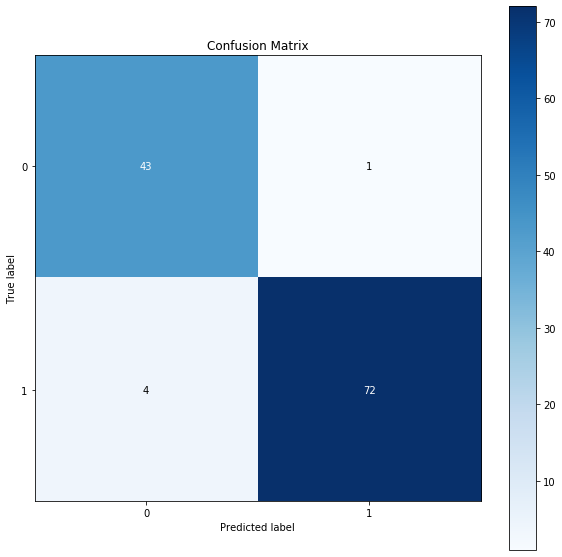

In [ ]:
y_pred_DT = DT_model.predict(X_test)
print("",metrics.classification_report(y_test, y_pred_DT))
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_DT,figsize=(10,10))

In [ ]:
metrics.confusion_matrix(y_test, y_pred_DT)

array([[43,  1],
       [ 4, 72]], dtype=int64)

# RANDOM FOREST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 100, 120],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [8, 10, 12, 14],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_model = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          n_jobs=-1,cv = 10,scoring='accuracy')
rf_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
print("",rf_model.best_estimator_)
print("",rf_model.best_score_)
print("",rf_model.best_params_)
print("",rf_model.best_index_)

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=120, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
 0.9892857142857142
 {'max_depth': 120, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
 102


               precision    recall  f1-score   support

           0       1.00      0.98      0.99        44
           1       0.99      1.00      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

 0.9916666666666667


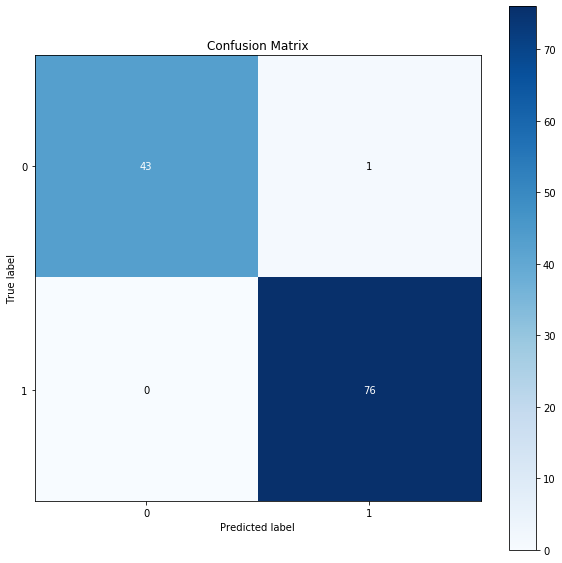

In [ ]:
y_pred_rf = rf_model.predict(X_test)
print("",metrics.classification_report(y_test, y_pred_rf))
print("",metrics.accuracy_score(y_test,y_pred_rf))
metrics.confusion_matrix(y_test, y_pred_rf)
sciplt.metrics.plot_confusion_matrix(y_test, y_pred_rf,figsize=(10,10))